In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("clean_4.csv")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,205005,127779,172.16.0.5-192.168.50.4-57177-19971-6,172.16.0.5,57177,192.168.50.4,19971,6,2018-11-03 10:19:10.280344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
1,1,205009,66687,172.16.0.5-192.168.50.4-31536-23-6,172.16.0.5,31536,192.168.50.4,23,6,2018-11-03 10:19:10.810546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
2,2,205012,130695,172.16.0.5-192.168.50.4-52312-20889-6,172.16.0.5,52312,192.168.50.4,20889,6,2018-11-03 10:19:16.979262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
3,3,205013,130921,172.16.0.5-192.168.50.4-44853-1274-6,172.16.0.5,44853,192.168.50.4,1274,6,2018-11-03 10:19:18.180510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
4,4,205016,24890,172.16.0.5-192.168.50.4-648-35182-17,172.16.0.5,648,192.168.50.4,35182,17,2018-11-03 10:19:25.529066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP


# Analyse de Forme :

In [4]:
df = data.copy()
#df = data.sample(frac=0.01, random_state=42)

In [5]:
df.shape
#df.info()

(1245798, 90)

In [6]:
df.dtypes.value_counts()

float64    45
int64      39
object      6
dtype: int64

<AxesSubplot:ylabel='None'>

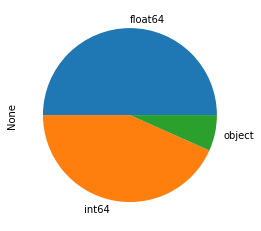

In [7]:
df.dtypes.value_counts().plot.pie()

In [8]:
df[' Label'].value_counts()

LDAP       200000
NetBIOS    200000
MSSQL      200000
UDP        200000
Syn        200000
Portmap    186960
BENIGN      56965
UDPLag       1873
Name:  Label, dtype: int64

Text(0.5, 1.0, 'Class Distributions ')

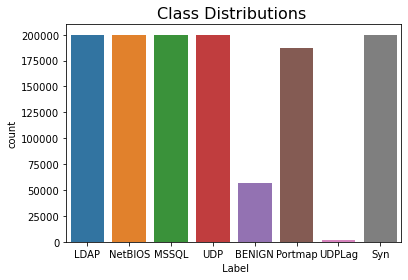

In [9]:
sns.countplot(x=' Label',data=df)
plt.title('Class Distributions ', fontsize=16)


# Preprocessing :

In [10]:
# replace the NAN values with 0
df.fillna(0)
df.replace([np.inf, -np.inf], 0, inplace=True)
df=df.dropna().reset_index(drop=True)
df = df.drop(['Unnamed: 0.1.1','Unnamed: 0','Unnamed: 0.1',
            ' Source IP',' Source Port',' Destination IP',' Destination Port',' Timestamp',
            'Flow ID','SimillarHTTP'], axis=1)
df.to_csv('ddos.csv', index=False)